In [1]:
# Jupyter notebook 경고 메시지 숨기기
from warnings import filterwarnings
filterwarnings(action="ignore")

# 실습과제 8-2
(교재 연습문제 5-8)

## 문제
선형적으로 분리되는 데이터셋에 `LinearSVC`를 훈련시켜 보세요. 그런 다음 같은 데이터셋에 `SVC`와 `SGDClassfier`를 적용해보세요.
거의 비슷한 모델이 만들어지는지 확인해보세요.

## 풀이
붓꽃 데이터셋을 사용하였다.

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = iris["target"]

X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

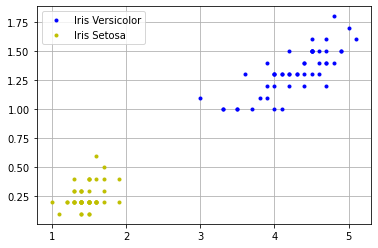

In [4]:
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "b.", label="Iris Versicolor")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "y.", label="Iris Setosa")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [5]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

lin_clf = LinearSVC(loss="hinge", C=5)
svm_clf = SVC(kernel="linear", C=5)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001,
                        alpha=1/(5*len(X)), max_iter=1000, tol=1e-3)


In [6]:
lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:       ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:             ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier:   ", sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:        [0.28475074] [[1.05364904 1.09903838]]
SVC:              [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier:    [0.115] [[0.77618931 0.72870715]]


그래프를 그리기 위해 각 결정 경계의 기울기와 편향을 구해준다.

In [7]:
# LinearSVC의 기울기와 편향
w_lin = -lin_clf.coef_[0, 0]    / lin_clf.coef_[0, 1]
b_lin = -lin_clf.intercept_[0]  / lin_clf.coef_[0, 1]

# SVC의 기울기와 편향
w_svm = -svm_clf.coef_[0, 0]    / svm_clf.coef_[0, 1]
b_svm = -svm_clf.intercept_[0]  / svm_clf.coef_[0, 1]

# SGDClassifier의 기울기와 편향
w_sgd = -sgd_clf.coef_[0, 0]    / sgd_clf.coef_[0, 1]
b_sgd = -sgd_clf.intercept_[0]  / sgd_clf.coef_[0, 1]

In [8]:
# 각 결정 경계를 원본 스케일로 변환
line_lin = scaler.inverse_transform([[-10, -10 * w_lin + b_lin], [10, 10 * w_lin + b_lin]])
line_svm = scaler.inverse_transform([[-10, -10 * w_svm + b_svm], [10, 10 * w_svm + b_svm]])
line_sgd = scaler.inverse_transform([[-10, -10 * w_sgd + b_sgd], [10, 10 * w_sgd + b_sgd]])

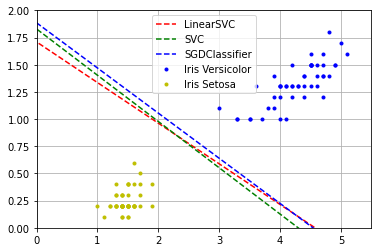

In [9]:
# 각 모델의 결정 경계를 표시
plt.plot(line_lin[:, 0], line_lin[:, 1], "r--", label="LinearSVC")
plt.plot(line_svm[:, 0], line_svm[:, 1], "g--", label="SVC")
plt.plot(line_sgd[:, 0], line_sgd[:, 1], "b--", label="SGDClassifier")

# 데이터를 표시
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "b.", label="Iris Versicolor")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "y.", label="Iris Setosa")

plt.legend(loc="upper center")
plt.grid(True)
plt.axis([0, 5.5, 0, 2])
plt.show()

# 실습과제 5-3
(교재 연습문제 5-9)

## 문제
MNIST 데이터셋에 SVM 분류기를 훈련시켜보세요. SVM 분류기는 이진 분류기라서 OvR 전략을 이용해 10개의 숫자를 분류해야 합니다.
처리 속도를 높이기 위해 작은 검증 세트로 하이퍼파라미터를 조정하는 것이 좋습니다. 어느 정도까지 정확도를 올릴 수 있나요?

## 풀이